<a href="https://colab.research.google.com/github/trongthuan205/DS102.K21/blob/master/06_LogisticRegression_iPhone_Purchase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0 . Load library

In [0]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# 1 . Load data

In [7]:
! git clone https://github.com/trongthuan205/DS102.K21 DS102.K21

Cloning into 'DS102.K21'...
remote: Enumerating objects: 59, done.
remote: Counting objects: 100% (59/59), done.
remote: Compressing objects: 100% (58/58), done.
remote: Total 364 (delta 27), reused 0 (delta 0), pack-reused 305
Receiving objects: 100% (364/364), 3.41 MiB | 16.02 MiB/s, done.
Resolving deltas: 100% (202/202), done.


In [0]:
data = pd.read_csv('DS102.K21/iphone_purchase_records.csv')

In [9]:
data.head

<bound method NDFrame.head of      Gender  Age  Salary  Purchase Iphone
0      Male   19   19000                0
1      Male   35   20000                0
2    Female   26   43000                0
3    Female   27   57000                0
4      Male   19   76000                0
..      ...  ...     ...              ...
395  Female   46   41000                1
396    Male   51   23000                1
397  Female   50   20000                1
398    Male   36   33000                0
399  Female   49   36000                1

[400 rows x 4 columns]>

In [0]:
X = data.iloc[:,0:-1].values

In [0]:
y = data.iloc[:,-1].values

# 2 . Preprocessing data

In [0]:
le = LabelEncoder()

In [12]:
le.fit(X[:,0])

LabelEncoder()

In [0]:
X[:,0] = le.transform(X[:,0])

# 3 . Split data

In [34]:
X_train = X[0:300]
X_train.shape

(300, 3)

In [35]:
y_train = y[0:300]
y_train.shape

(300,)

In [36]:
X_test = X[300:]
X_test.shape

(100, 3)

In [37]:
y_test = y[300:]
y_test.shape

(100,)

# 4 . Normalize data

In [0]:
SC = StandardScaler()

In [0]:
X_train = SC.fit_transform(X_train[:,1:])

In [0]:
X_test = SC.fit_transform(X_test[:,1:])

# 5 . Build and Train model

In [0]:
model = LogisticRegression(random_state = 0)

In [42]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# 6 . Visualize data


In [0]:
def VisualizingDataset(X_, y_):
    X1 = X_[:,0]
    X2 = X_[:,1]
    for i, label in enumerate(np.unique(y_)):
        plt.scatter(X1[y_ == label], X2[y_ == label], color = ListedColormap(('red', 'green'))(i))
        plt.legend(np.unique(y_))

In [0]:
def VisualizingResult(model, X_):
    X1 = X_[:,0]
    X2 = X_[:,1]
    X1_range = np.arange(X1.min()-1, X1.max()+1, 0.01)
    X2_range = np.arange(X2.min()-1, X2.max()+1, 0.01)
    X1_matrix, X2_matrix = np.meshgrid(X1_range, X2_range)
    X_grid = np.array([X1_matrix.ravel(), X2_matrix.ravel()]).T
    y_grid = model.predict(X_grid).reshape(X1_matrix.shape)
    plt.contourf(X1_matrix, X2_matrix, y_grid, alpha = 0.5, cmap = ListedColormap(('red','green')))

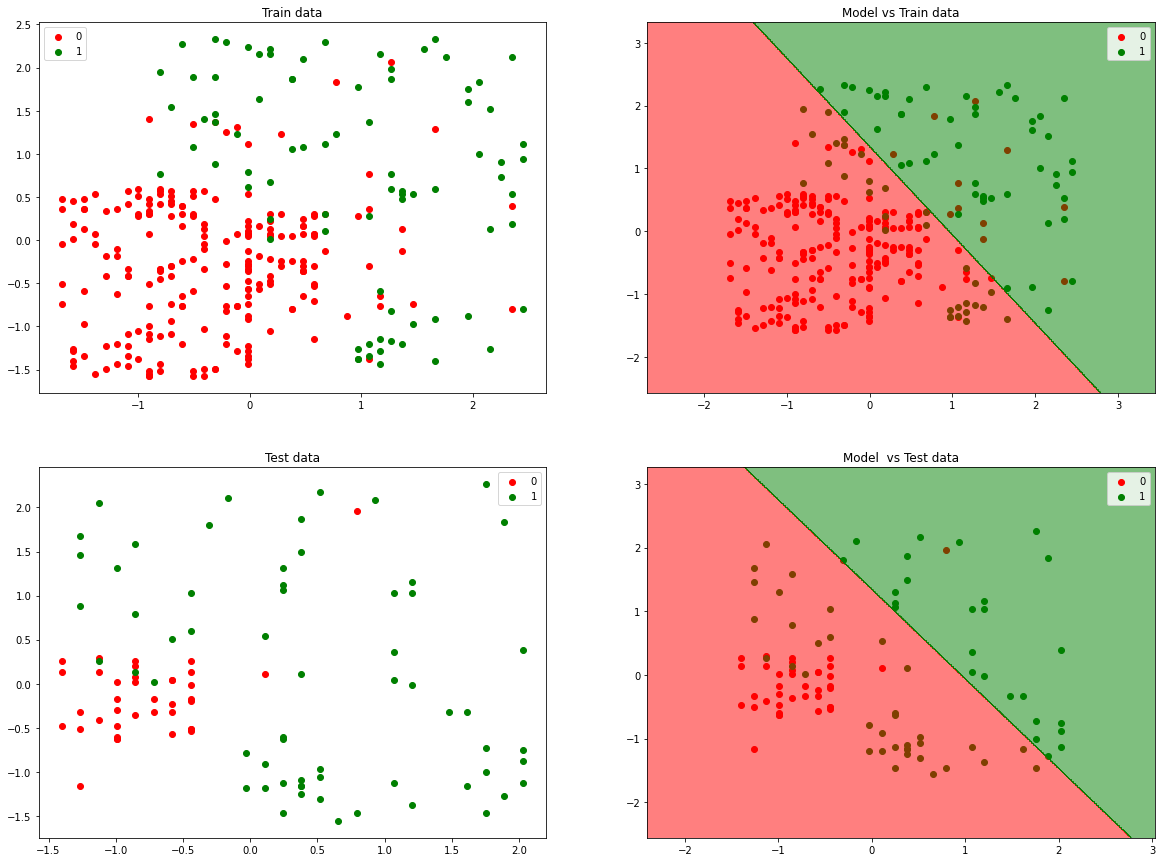

In [45]:
plt.figure(figsize = (20,15))
plt.subplot(2,2,1)
VisualizingDataset(X_train, y_train)
plt.title('Train data')
plt.subplot(2,2,2)
VisualizingDataset(X_train, y_train)
VisualizingResult(model, X_train)
plt.title('Model vs Train data')
plt.subplot(2,2,3)
VisualizingDataset(X_test, y_test)
plt.title('Test data')
plt.subplot(2,2,4)
VisualizingDataset(X_test, y_test)
VisualizingResult(model, X_test)
plt.title('Model  vs Test data')
plt.show()

# 7 . Evaluate model

Accuracy score in train data:  0.86
Confusion matrix in train data: 
 [[208  11]
 [ 31  50]]


Text(0.5, 1.0, 'Confusion matrix in Train data')

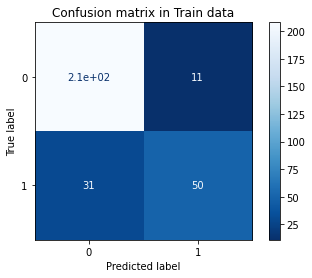

In [50]:
y_train_pred = model.predict(X_train)
print('Accuracy score in train data: ', accuracy_score(y_train, y_train_pred))
print('Confusion matrix in train data: \n', confusion_matrix(y_train, model.predict(X_train)))
plot_confusion_matrix(model, X_train, y_train, cmap = 'Blues_r')
plt.title('Confusion matrix in Train data')

Accuracy score in test data:  0.63
Confusion matrix in Test data: 
 [[37  1]
 [36 26]]


Text(0.5, 1.0, 'Confusion matrix in Test data')

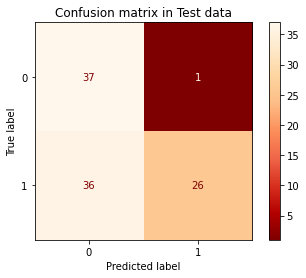

In [52]:
y_test_pred = model.predict(X_test)
print('Accuracy score in test data: ', accuracy_score(y_test, y_test_pred))
print('Confusion matrix in Test data: \n', confusion_matrix(y_test, model.predict(X_test)))
plot_confusion_matrix(model, X_test, y_test, cmap = 'OrRd_r')
plt.title('Confusion matrix in Test data')